In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
car = pd.read_csv("mtcars.csv")
car.head(6)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1


In [4]:
car.shape

(32, 12)

In [5]:
car.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [6]:
car.isnull().sum() #No null value found

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

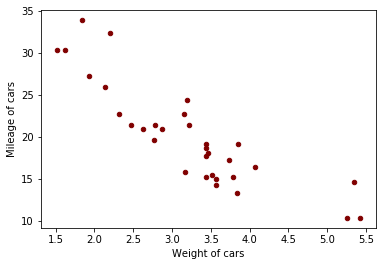

In [7]:
#Checking relationship between weight and mileage of car
car.plot(kind='scatter', x = 'wt', y = 'mpg', color = 'maroon')
plt.xlabel('Weight of cars')
plt.ylabel("Mileage of cars")
plt.show()

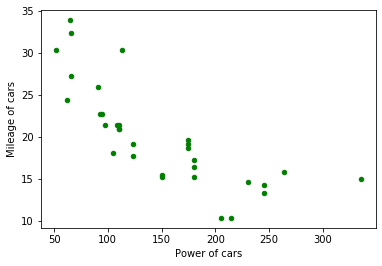

In [8]:
car.plot(kind='scatter', x = 'hp', y = 'mpg', color = 'green')
plt.xlabel('Power of cars')
plt.ylabel("Mileage of cars")
plt.show()

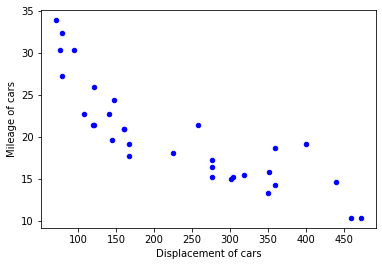

In [9]:
car.plot(kind='scatter', x = 'disp', y = 'mpg', color = 'blue')
plt.xlabel('Displacement of cars')
plt.ylabel("Mileage of cars")
plt.show()

In [12]:
cnt = car['am'].value_counts()
cnt

0    19
1    13
Name: am, dtype: int64

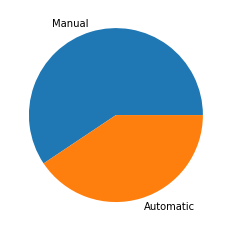

In [13]:
lab = ["Manual","Automatic"]
plt.pie(cnt,labels=lab)
plt.show()

In [14]:
cnt = car.cyl.value_counts()
cnt

8    14
4    11
6     7
Name: cyl, dtype: int64

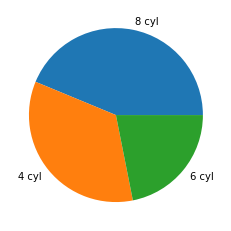

In [17]:
labl = ['8 cyl','4 cyl', '6 cyl']
plt.pie(cnt,labels=labl)
plt.show()

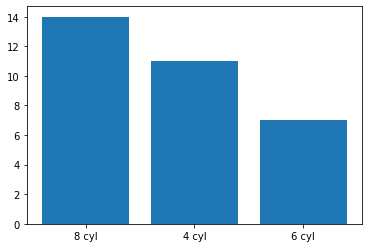

In [18]:
plt.bar(labl,cnt)
plt.show()

In [19]:
cnt_gear = car['gear'].value_counts()

In [20]:
cnt_gear

3    15
4    12
5     5
Name: gear, dtype: int64

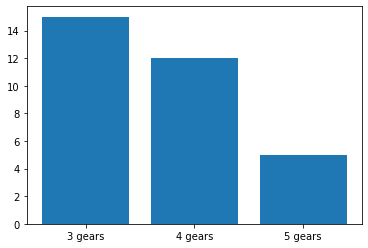

In [21]:
labl = ['3 gears', '4 gears','5 gears']
plt.bar(labl,cnt_gear)
plt.show()

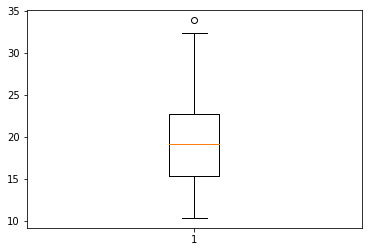

In [45]:
#Box Plots
plt.boxplot(car['mpg'])
plt.show()

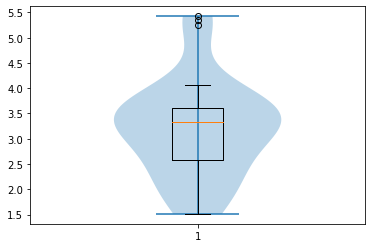

In [47]:
plt.boxplot(car['wt'])
plt.violinplot(car['wt'])
plt.show()

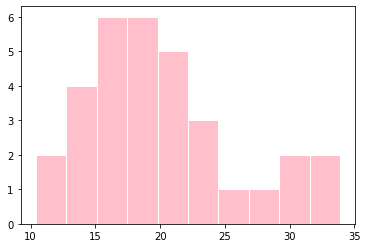

In [44]:
plt.hist(car['mpg'], edgecolor = 'white', color = 'pink')
plt.show()

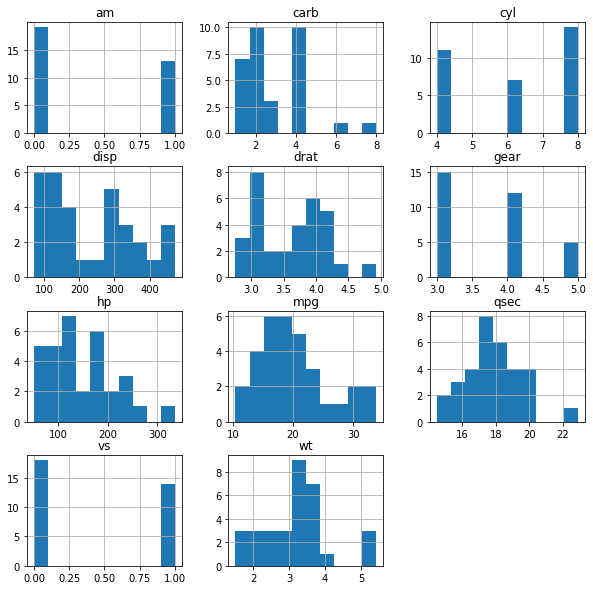

In [42]:
car.hist(figsize=(10,10))
plt.show()

In [22]:
#Split in to input and output
X = car[['wt','hp','disp']]
y = car['mpg']

In [23]:
print(X.shape)
print(y.shape)

(32, 3)
(32,)


In [24]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [30]:
#Using Linear regression
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_pred = model.predict(x_test)
y_pred

array([21.82122033,  8.74989455,  9.60231874, 25.91953557, 17.04962266,
       21.15230747, 25.18870943])

In [33]:
y_test

29    19.7
15    10.4
14    10.4
2     22.8
13    15.2
3     21.4
20    21.5
Name: mpg, dtype: float64

In [34]:
from sklearn.metrics import r2_score

In [35]:
r2_score(y_test, y_pred)

0.796096914847298